<a href="https://colab.research.google.com/github/dina-masry/Heart-Disease-Prediction/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Required packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


##Load data

In [ ]:
path= '/content/drive/MyDrive/AXSOSACADEMY/05-IntermediateML/Week19/Data/heart - heart.csv'
df = pd.read_csv(path)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##Inspect data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


- There are 12 features and 918 records.
- it seems there is no null values.
- There are catogrical features must be encoded.

In [ ]:
# check duplicates rows
df.duplicated().sum()

np.int64(0)

- There is no duplicates rows.

In [ ]:
# check consistencies in catogrical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
  print(df[col].value_counts())
  print('*************************************')

Sex
M    725
F    193
Name: count, dtype: int64
*************************************
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
*************************************
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
*************************************
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
*************************************
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
*************************************


- There is no any consistencies.

In [ ]:
# check unusual values in num_cols
num_cols = df.select_dtypes(exclude='object').columns
df[num_cols].describe().round(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


- There is no any unusual values.

##Preprocessing the data

In [ ]:
y= df['HeartDisease']
X= df.drop(columns='HeartDisease')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# for numeric features
numeric_features = X_train.select_dtypes(include='number').columns
scaler = StandardScaler()
num_tuple = ('numeric', scaler , numeric_features)

In [ ]:
# for ordinal feature
ordinal_feature = 'ST_Slope'
categories= [['Up', 'Flat', 'Down']] # Categories need to be in a list of lists
ordinal_encoder = OrdinalEncoder(categories= categories)
scaler = StandardScaler()
ord_pipe = make_pipeline(ordinal_encoder, scaler)
ord_tuple = ('ordinal', ord_pipe, [ordinal_feature]) # Pass ordinal_feature as a list

In [ ]:
# for categorial features
categorical_features = X_train.select_dtypes(include='object').drop(columns=['ST_Slope']).columns
onehot_encoder = OneHotEncoder(sparse_output=False , drop='first')
cat_tuple = ('categorical', onehot_encoder, categorical_features)

In [ ]:
# fit and transform
preprocessor = ColumnTransformer(transformers=[num_tuple, ord_tuple, cat_tuple],verbose_feature_names_out= False)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Instantiate Neural Network

In [ ]:
input_shape = X_train_processed.shape[1] # returns the number of features
input_shape

14

In [ ]:
# define the model type
model = Sequential()

In [ ]:
# Add hidden layers
# add the first hidden layer
model.add(Dense(14, activation='relu', input_dim= input_shape))
# add the second hidden layer
model.add(Dense(7, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# add output layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# complie the model
model.compile(loss='bce', optimizer='adam', metrics=['accuracy',tf.metrics.Precision(name= 'precision'), tf.metrics.Recall(name = 'recall')])

In [ ]:
# fit the model
history = model.fit(X_train_processed, y_train, validation_split=0.2, epochs= 20)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6631 - loss: 0.6375 - precision: 0.6655 - recall: 0.7992 - val_accuracy: 0.7754 - val_loss: 0.5838 - val_precision: 0.7126 - val_recall: 0.9118
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7089 - loss: 0.5857 - precision: 0.6979 - recall: 0.8661 - val_accuracy: 0.8261 - val_loss: 0.5496 - val_precision: 0.7500 - val_recall: 0.9706
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8015 - loss: 0.5463 - precision: 0.7830 - recall: 0.8997 - val_accuracy: 0.8406 - val_loss: 0.5164 - val_precision: 0.7614 - val_recall: 0.9853
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7646 - loss: 0.5272 - precision: 0.7588 - recall: 0.8405 - val_accuracy: 0.8478 - val_loss: 0.4880 - val_precision: 0.7701 - val_recall: 0.9853
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7783 - loss: 0.5035 - precision: 0.7596 - recall: 0.8743 - val_accuracy: 0.8551 - val_loss: 0.4620 - va

In [ ]:
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

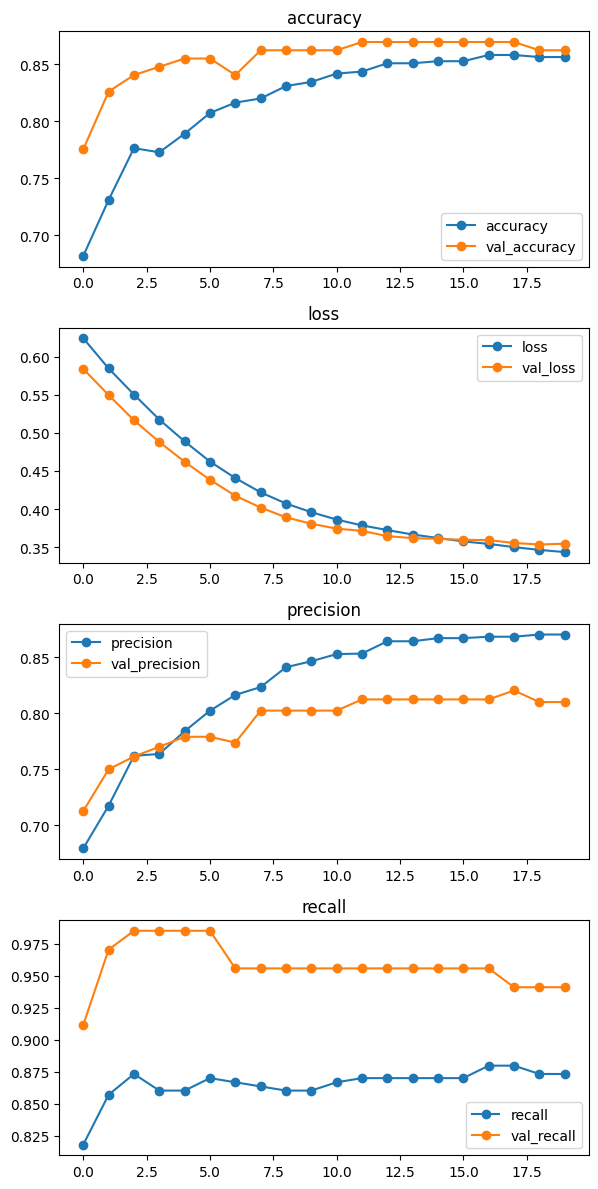

In [ ]:
plot_history(history);

In [ ]:
# evaluate
model.evaluate(X_test_processed, y_test,return_dict=True)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8337 - loss: 0.3791 - precision: 0.8593 - recall: 0.8500 


{'accuracy': 0.856521725654602,
 'loss': 0.349617600440979,
 'precision': 0.8897637724876404,
 'recall': 0.8560606241226196}

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       312
           1       0.86      0.89      0.88       376

    accuracy                           0.86       688
   macro avg       0.86      0.86      0.86       688
weighted avg       0.86      0.86      0.86       688



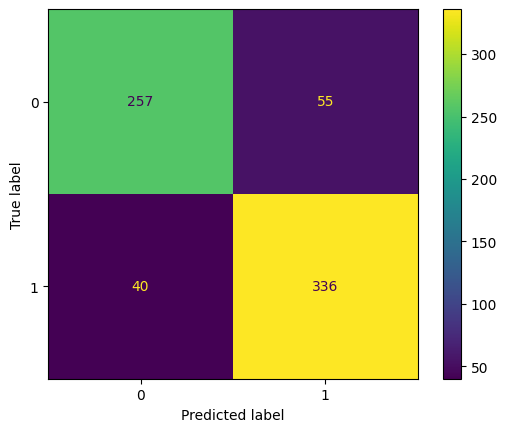

In [ ]:
train_preds = model.predict(X_train_processed).round()
print(classification_report(y_train, train_preds))
ConfusionMatrixDisplay.from_predictions(y_train, train_preds);

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        98
           1       0.89      0.86      0.87       132

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230



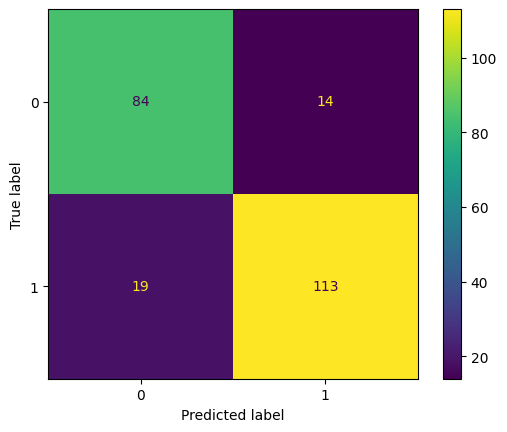

In [ ]:
# evaluate the model with sklearn metrics
test_preds = model.predict(X_test_processed).round()
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds);

# Second model

In [ ]:
model2 = Sequential()
# add hidden layers
model2.add(Dense(64, activation='relu', input_dim= input_shape))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(4, activation='relu'))
# add output layer
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
# complie the model
model2.compile(loss='bce', optimizer='adam', metrics=['accuracy',tf.metrics.Precision(name= 'precision'), tf.metrics.Recall(name = 'recall')])

In [ ]:
# fit
history2 = model2.fit(X_train_processed, y_train, validation_split=0.2, epochs= 10)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9447 - loss: 0.1537 - precision: 0.9581 - recall: 0.9411 - val_accuracy: 0.8406 - val_loss: 0.4822 - val_precision: 0.7738 - val_recall: 0.9559
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9200 - loss: 0.2073 - precision: 0.9300 - recall: 0.9226 - val_accuracy: 0.7971 - val_loss: 0.5044 - val_precision: 0.7500 - val_recall: 0.8824
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9311 - loss: 0.1647 - precision: 0.9426 - recall: 0.9275 - val_accuracy: 0.8261 - val_loss: 0.4930 - val_precision: 0.7683 - val_recall: 0.9265
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9098 - loss: 0.1994 - precision: 0.9458 - recall: 0.8849 - val_accuracy: 0.8043 - val_loss: 0.4901 - val_precision: 0.7595 - val_recall: 0.8824
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9313 - loss: 0.1845 - precision: 0.9489 - recall: 0.9248 - val_accuracy: 0.8188 - val_loss: 0.5322 - 

(<Figure size 600x1200 with 4 Axes>,
 array([<Axes: title={'center': 'accuracy'}>,
        <Axes: title={'center': 'loss'}>,
        <Axes: title={'center': 'precision'}>,
        <Axes: title={'center': 'recall'}>], dtype=object))

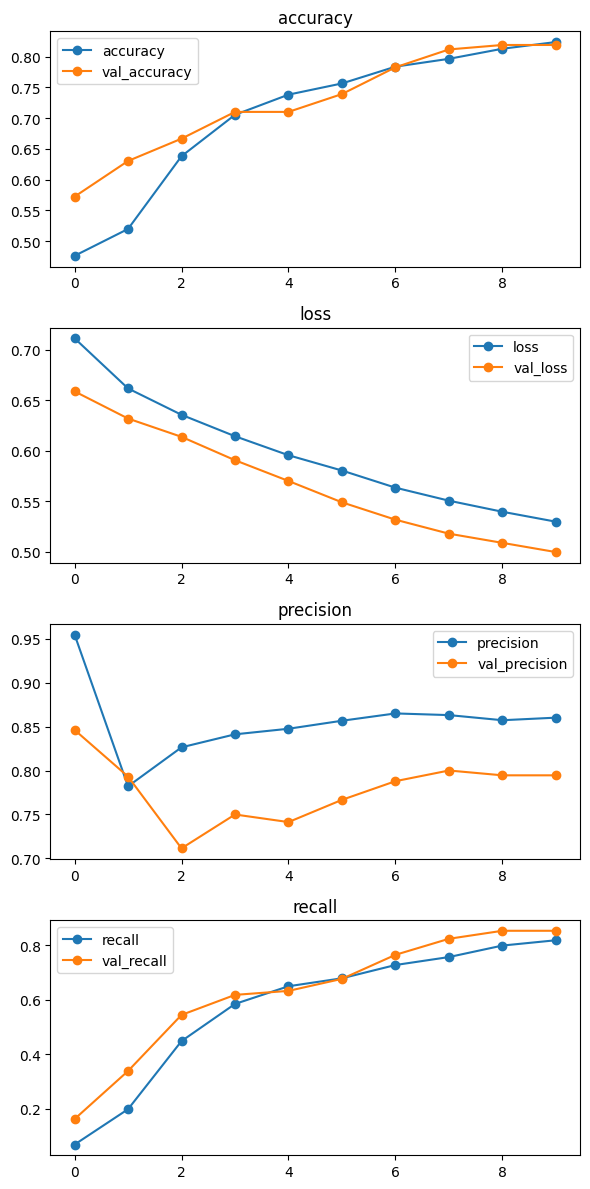

In [ ]:
plot_history(history2)

In [ ]:
# evaluate
model2.evaluate(X_test_processed, y_test,return_dict=True)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8017 - loss: 0.5804 - precision: 0.8629 - recall: 0.7766 


{'accuracy': 0.821739137172699,
 'loss': 0.5601963400840759,
 'precision': 0.8823529481887817,
 'recall': 0.7954545617103577}

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.76      0.86      0.80        98
           1       0.88      0.80      0.84       132

    accuracy                           0.82       230
   macro avg       0.82      0.83      0.82       230
weighted avg       0.83      0.82      0.82       230



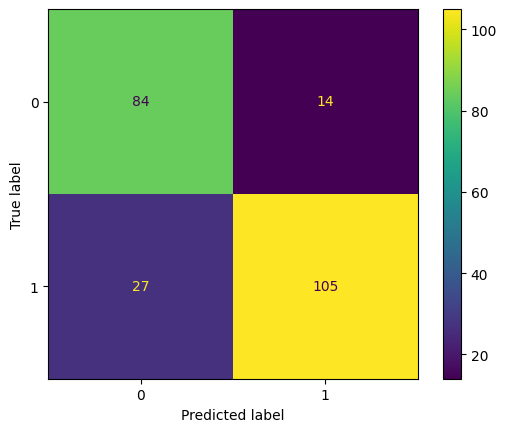

In [ ]:
# evaluate the model with sklearn metrics
test_preds = model2.predict(X_test_processed).round()
print(classification_report(y_test, test_preds))
print(ConfusionMatrixDisplay.from_predictions(y_test, test_preds))

##Third model

In [ ]:
model3= Sequential()
model3.add(Dense(100, activation='relu', input_dim= input_shape))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(10, activation='tanh'))
model3.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile
model3.compile(loss='bce', optimizer='adam', metrics=['accuracy',tf.metrics.Precision(name= 'precision'), tf.metrics.Recall(name = 'recall')])

In [ ]:
# fit
history3 = model3.fit(X_train_processed, y_train, validation_split=0.2, epochs= 10)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6745 - loss: 0.6057 - precision: 0.8638 - recall: 0.4987 - val_accuracy: 0.8406 - val_loss: 0.4310 - val_precision: 0.7805 - val_recall: 0.9412
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8114 - loss: 0.4430 - precision: 0.7851 - recall: 0.8938 - val_accuracy: 0.8406 - val_loss: 0.3831 - val_precision: 0.7875 - val_recall: 0.9265
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8399 - loss: 0.3770 - precision: 0.8396 - recall: 0.8792 - val_accuracy: 0.8333 - val_loss: 0.3742 - val_precision: 0.7848 - val_recall: 0.9118
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8453 - loss: 0.3671 - precision: 0.8518 - recall: 0.8917 - val_accuracy: 0.8406 - val_loss: 0.3728 - val_precision: 0.7875 - val_recall: 0.9265
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8829 - loss: 0.3178 - precision: 0.8709 - recall: 0.9160 - val_accuracy: 0.8406 - val_loss: 0.3767 - va

(<Figure size 600x1200 with 4 Axes>,
 array([<Axes: title={'center': 'accuracy'}>,
        <Axes: title={'center': 'loss'}>,
        <Axes: title={'center': 'precision'}>,
        <Axes: title={'center': 'recall'}>], dtype=object))

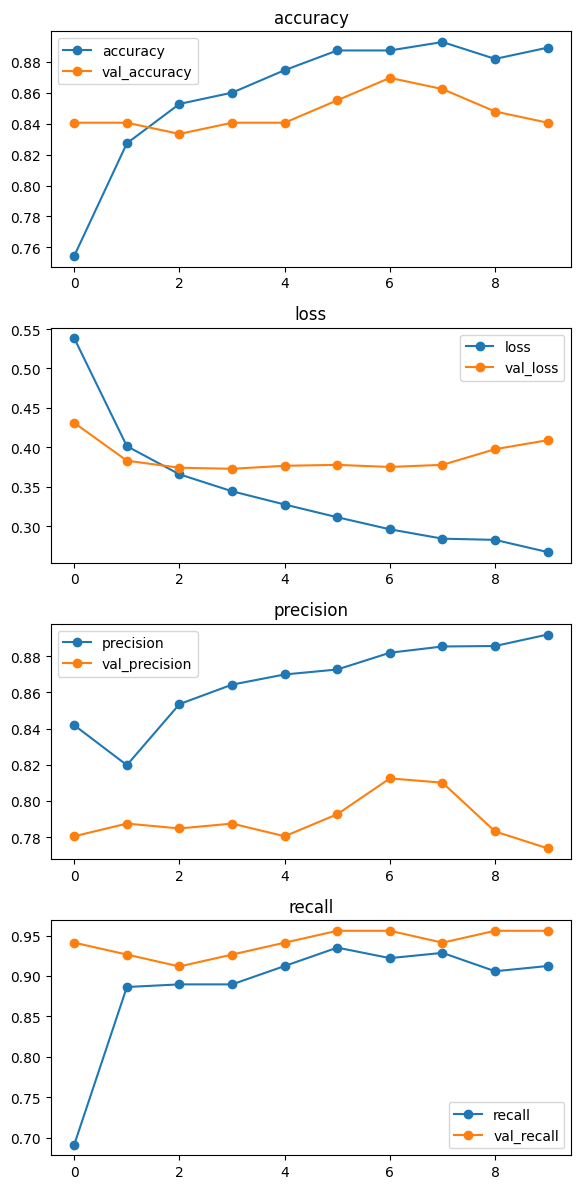

In [ ]:
plot_history(history3)

In [ ]:
# evaluate
model3.evaluate(X_test_processed, y_test,return_dict=True)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8494 - loss: 0.3349 - precision: 0.8452 - recall: 0.9033 


{'accuracy': 0.8695651888847351,
 'loss': 0.3099512755870819,
 'precision': 0.875,
 'recall': 0.9015151262283325}

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        98
           1       0.88      0.90      0.89       132

    accuracy                           0.87       230
   macro avg       0.87      0.86      0.87       230
weighted avg       0.87      0.87      0.87       230



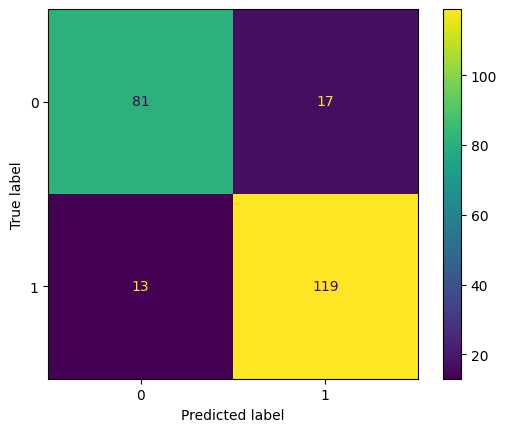

In [ ]:
# evaluate
test_preds = model3.predict(X_test_processed).round()
print(classification_report(y_test, test_preds))
print(ConfusionMatrixDisplay.from_predictions(y_test, test_preds))